In [28]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from proj1_helpers import *
from implementations import * 
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = os.path.dirname(os.getcwd()) + '/data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH) # labels/predictions, id of each sample, tX - 30 features of each sample (float)

In [3]:
y_explore, tX_explore, ids_explore = load_csv_data(DATA_TRAIN_PATH,sub_sample = True) # subsample to do data exploration

## Data Exploration

In [4]:
num_samples = len(y)
num_features0 = tX.shape[1]

print("Number of samples in train data set: {}".format(num_samples))
print("Initial number of features in train data set : {}".format(num_features0))

Number of samples in train data set: 250000
Initial number of features in train data set : 30


In [5]:
print("Number of Nan values in train data set : {}".format(np.argwhere(np.isnan(tX)).shape[0]))
print("Number of Nan values in train data set : {}".format(np.count_nonzero(np.where(tX == np.nan, 1,0))))

Number of Nan values in train data set : 0
Number of Nan values in train data set : 0


In [6]:
tX.dtype

dtype('float64')

In [7]:
range_ = []
for i in range(num_features0):
    range_.append(len(np.unique(tX_explore[:,i])))

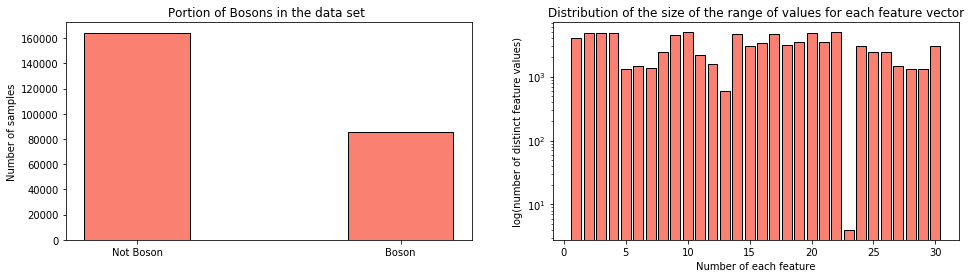

In [8]:
# See the proportion of the 2 class
labels = ['Not Boson','Boson']
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Portion of Bosons in the data set ')
axes[0].bar([-1,1],[np.sum(y==-1),np.sum(y==1)], color='salmon', edgecolor='black', linewidth=1, log = False);
axes[0].set_ylabel('Number of samples')
axes[0].set_xticks([-1,1])
axes[0].set_xticklabels(labels)

axes[1].set_title('Distribution of the size of the range of values for each feature vector')
axes[1].bar(np.arange(num_features0)+1,range_, color='salmon', edgecolor='black', linewidth=1, log = True);
axes[1].set_xlabel('Number of each feature')
axes[1].set_ylabel('log(number of distinct feature values)')
plt.show()

We see that the proportion is not equal, we have to make sure the optimisation procedure takes this into account (proportion of classes in each set, class error instead of classification error)
We see that one feature among all features exhibit a much more restricted range of values, probably a category feature

In [9]:
ids_explore[22]

101100

In [10]:
np.unique(tX_explore[:,22])

array([0., 1., 2., 3.])

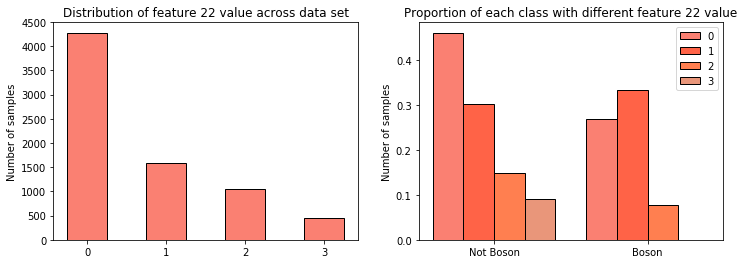

In [11]:
labels1 = ['Not Boson','Boson']
labels0 = ['0','1','2','3']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(np.arange(4),[np.sum(tX_explore==0.),np.sum(tX_explore==1.),np.sum(tX_explore==2.),np.sum(tX_explore==3.)],width=0.5, color='salmon', align='center',edgecolor='black')
axes[0].set_title('Distribution of feature 22 value across data set')
axes[0].set_ylabel('Number of samples')
axes[0].set_xticks(np.arange(4))
axes[0].set_xticklabels(labels0)
axes[1].bar(np.arange(1,3)-0.4, [np.sum(y_explore[tX_explore[:,22]==0.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==0.] ==1)/np.sum(y_explore == 1)], width=0.2, color='salmon', align='center',edgecolor='black',label = '0')
axes[1].bar(np.arange(1,3)-0.2, [np.sum(y_explore[tX_explore[:,22]==1.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==2.] ==1)/np.sum(y_explore == 1)], width=0.2, color='tomato', align='center',edgecolor='black',label = '1')
axes[1].bar(np.arange(1,3), [np.sum(y_explore[tX_explore[:,22]==2.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==3.] ==1)/np.sum(y_explore == 1)], width=0.2, color='coral', align='center',edgecolor='black',label = '2')
axes[1].bar(np.arange(1,3)+0.2, [np.sum(y_explore[tX_explore[:,22]==3.] ==-1)/np.sum(y_explore == -1),np.sum(y_explore[tX_explore[:,22]==4.] ==1)/np.sum(y_explore == 1)], width=0.2, color='darksalmon', align='center',edgecolor='black',label = '3')
axes[1].set_title('Proportion of each class with different feature 22 value')
axes[1].set_ylabel('Number of samples')
axes[1].set_xticks([0.9,1.9])
axes[1].set_xticklabels(labels1)
axes[1].legend()
plt.show()

## Feature Engineering

### *Dealing with undefined values* ###

In [12]:
# Splitting the dataset based on the value of PRI_jet_num and 
# removing undefined features for the corresponding subsets

ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y = split_subsets(tX, y)

print(ss0_tX.shape)
print(ss1_tX.shape)
print(ss2_tX.shape)
print(ss3_tX.shape)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
(99913, 19)
(77544, 22)
(50379, 29)
(22164, 29)


In [13]:
print("Number of remaining undefined values in subset 0 : {}".format(np.count_nonzero(ss0_tX == -999.0)))
undefined_indices = np.argwhere(ss0_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 1 : {}".format(np.count_nonzero(ss1_tX == -999.0)))
undefined_indices = np.argwhere(ss1_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 2 : {}".format(np.count_nonzero(ss2_tX == -999.0)))
undefined_indices = np.argwhere(ss2_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

print("Number of remaining undefined values in subset 3 : {}".format(np.count_nonzero(ss3_tX == -999.0)))
undefined_indices = np.argwhere(ss3_tX == -999.0)

unique_elements, counts_elements = np.unique(undefined_indices[:,1], return_counts=True)
print("Feature repartition of these values : {}".format(np.asarray((unique_elements, counts_elements))))

Number of remaining undefined values in subset 0 : 26123
Feature repartition of these values : [[    0]
 [26123]]
Number of remaining undefined values in subset 1 : 7562
Feature repartition of these values : [[   0]
 [7562]]
Number of remaining undefined values in subset 2 : 2952
Feature repartition of these values : [[   0]
 [2952]]
Number of remaining undefined values in subset 3 : 1477
Feature repartition of these values : [[   0]
 [1477]]


Thus all remaining undefined values belong to the first feature **DER_mass_MMC**.

In [29]:
# CREATING DIFFERENT SUBSETS OF FEATURES TO TEST

# Subset feature 1 : only primitive features w
ss0_tX1 = ss0_tX[13:]
ss1_tX1 = ss1_tX[13:]
ss2_tX1 = ss2_tX[13:]
ss3_tX1 = ss3_tX[13:]
# Subset feature 2 : primitive and derivated features with removal of DER_mass_MMC
ss0_tX2 = ss0_tX[1:]
ss1_tX2 = ss1_tX[1:]
ss2_tX2 = ss2_tX[1:]
ss3_tX2 = ss3_tX[1:]
# Subset feature 3 : primitive and derivated features with replacemnet of DET_mass_MMC by median of defined values
ss0_tX3 = replace_undef_feat(ss0_tX,method = 'median')
ss1_tX3 = replace_undef_feat(ss1_tX,method = 'median')
ss2_tX3 = replace_undef_feat(ss2_tX,method = 'median')
ss3_tX3 = replace_undef_feat(ss3_tX,method = 'median')

[ True  True  True ... False  True False] [False False False ...  True False  True]
[ True False  True ... False  True  True] [False  True False ...  True False False]
[ True  True  True ...  True  True  True] [False False False ... False False False]
[ True  True  True ... False False  True] [False False False ...  True  True False]


### _Dealing with outliers_

In [ ]:
#Plotting sccatter of the features

for i in range(0,np.size(ss0_tX,1)-1,2):
    fig = scatter_visualization(ss0_y, ss0_tX[:,i], ss0_tX[:,i+1],i)
    fig.set_size_inches(25.0,4.0)

In [ ]:
#Plotting histograms of the features

for i in range(0,np.size(ss0_tX,1)-1,2):
    fig = histo_visualization(ss0_tX[:,i], ss0_tX[:,i+1])
    fig.set_size_inches(25.0,4.0)

### *Feature augmentation* ###

In [15]:
# Augmentation + standardization se faire automatiquement dans la cross val, suffit de specifier le degree

## Model selection and Optimisation

## Least Square

In [ ]:
w_ls, loss_ls = least_squares(y_explore, tX_sd)

In [ ]:
print('Percentage of correct classification on train set : {}'.format(loss_ls))

## Least Square Gradient Descent

In [ ]:
initial_w = np.zeros(10)
max_iters = 500
gamma = 0.1

In [ ]:
w_ls_GD, loss_ls_GD = least_squares_GD(y, tX_sd[:,:10], initial_w, max_iters, gamma)

In [ ]:
print('Final class error on train data : {}'.format(loss_ls_GD))

## Least Square Stochastic Gradient Descent

In [ ]:
initial_w = np.zeros(3)
max_iters = 500
gamma = 0.1

In [ ]:
w_ls_SGD, loss_ls_SGC = least_squares_SGD(y, tX[:,:3], initial_w, max_iters, gamma)

## Ridge Regression

In [ ]:
from implementations import * 
lambdas = [0.1,0.2,0.3]
degree = 1
seed = 16


In [ ]:
cross_validation_demo(ss2_y, ss2_tX, degree, seed, lambdas, class_distribution = True)

## Logistic Regression

In [ ]:
initial_w = np.zeros(3)
max_iters = 500
gamma = 0.1

In [ ]:
logistic_regression(y, tX[:,:3], initial_w, max_iters, gamma)

### Regularized Logistic Regression

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = os.path.dirname(os.getcwd()) + '/data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
ss0_tX_test, index0, ss1_tX_test, index1, ss2_tX_test, index2, ss3_tX_test, index3= split_subsets_test(tX_test)

In [ ]:
# A CHANGER POUR CHAQUE SUBMISSION AVEC BEST WEIGHTS !!!
weights0 = np.ones(ss0_tX_test.shape[1])
weights1 = np.ones(ss1_tX_test.shape[1])
weights2 = np.ones(ss2_tX_test.shape[1])
weights3 = np.ones(ss3_tX_test.shape[1])

# NE PLUS RIEN CHANGER A PARTIR D'ICI
# Subset 0 
y_pred0 = predict_labels(weights0, ss0_tX_test)
#Subset 1
y_pred1 = predict_labels(weights1, ss1_tX_test)
#Subset 2
y_pred2 = predict_labels(weights2, ss2_tX_test)
#Subset 3
y_pred3 = predict_labels(weights3, ss3_tX_test)

#Stack all prediction from 4 subgroups to get y_pred in corredt order 
y_pred = np.ones(len(ids_test))
y_pred[index0] = y_pred0
y_pred[index1] = y_pred1
y_pred[index2] = y_pred2
y_pred[index3] = y_pred3

In [ ]:
OUTPUT_PATH = os.path.dirname(os.getcwd()) + '/data/' + str(datetime.now())# TODO: fill in desired name of output file for submission
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)